ETF Information

In [57]:
import pandas as pd
from pathlib import Path
import numpy as np


#importing matplotlib setting style for plotting later
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading datasets
database_path= r'database'
# Get the files from the path
files = Path(database_path).glob('*.csv')
#Add new column with file name
dfs = list()
for f in files:
    data = pd.read_csv(f)
    data['ETF_name'] = f.stem
    dfs.append(data)
    
etf = pd.concat(dfs, ignore_index=True)
etf = etf.set_index("ETF_name")

#Selecting and printing columns
print(etf.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


Presenting unique ETF

In [60]:
#Selecting unique ETF and setting the index
unique_etf = etf.index.unique()
print(unique_etf)
print(etf.head())


Index(['ARKF', 'BITQ', 'BLOK', 'EMFQ', 'FINX', 'FNTC', 'IPAY', 'IYG', 'KOIN',
       'TPAY'],
      dtype='object', name='ETF_name')
                               Date       Open       High        Low  \
ETF_name                                                               
ARKF      2019-02-04 00:00:00-05:00  19.837522  20.073683  19.834570   
ARKF      2019-02-05 00:00:00-05:00  20.152404  20.280325  20.103204   
ARKF      2019-02-06 00:00:00-05:00  20.191766  20.205542  19.985124   
ARKF      2019-02-07 00:00:00-05:00  19.965444  19.994963  19.680082   
ARKF      2019-02-08 00:00:00-05:00  19.680081  19.886721  19.630882   

              Close  Volume  Dividends  Stock Splits  
ETF_name                                              
ARKF      20.073683   47200        0.0             0  
ARKF      20.204557  110700        0.0             0  
ARKF      20.142565   45300        0.0             0  
ARKF      19.847363   58200        0.0             0  
ARKF      19.867043   18900     

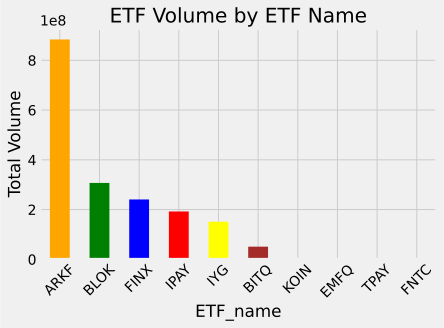

ETF_name
ARKF    883711400
BLOK    307012100
FINX    240608700
IPAY    192341300
IYG     151233100
BITQ     51067800
KOIN      5528700
EMFQ      3815000
TPAY      2087906
FNTC       337200
Name: Volume, dtype: int64


In [76]:
# plot
COLORS = ('orange','green', 'blue', 'red', 'yellow', 'brown', 'darkgreen', 'darkblue')


# Grouping by ETF_name and summing the Volume
volume_sum_by_etf = etf.groupby("ETF_name")["Volume"].sum()

# Sort the volume_sum_by_etf Series in descending order
volume_sum_by_etf = volume_sum_by_etf.sort_values(ascending=False)

# Plotting the bar plot
ax = volume_sum_by_etf.plot(kind='bar', color=COLORS, legend=False, grid=True)
ax.set_ylabel('Total Volume')
ax.set_title('ETF Volume by ETF Name')
plt.xticks(rotation=45)
    

plt.tight_layout()
plt.show()
print(volume_sum_by_etf)
